In [1]:
# Dependencies and Setup
%matplotlib inline

import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import sem

# Hide warning messages in notebook

import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)

mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

drug_clinical_trail=pd.merge(clinical_trial_data,mouse_drug_data,how="left", on="Mouse ID")

# Display the data table for preview

drug_clinical_trail.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [27]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_tumor_vol =drug_clinical_trail.groupby(['Drug', 'Timepoint']).mean()["Tumor Volume (mm3)"]
tumor_vol=pd.DataFrame(mean_tumor_vol)
tumor_vol



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [28]:
#Reset index to Dataframe and create pivot table

tumor_vol=tumor_vol.reset_index()
tumor_vol_pivot=tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_vol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [30]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame

SE_volume =drug_clinical_trail.groupby(['Drug', 'Timepoint']).sem()["Tumor Volume (mm3)"]
SE_tumor_volume=pd.DataFrame(SE_volume)

SE_tumor_volume.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [31]:
#create Pivot table

SE_tumor_volume=SE_tumor_volume.reset_index()
SE_tumor_volume_pivot=SE_tumor_volume.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
SE_tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

SE_tumor_vol =drug_clinical_trail.groupby(['Drug', 'Timepoint']).sem()["Tumor Volume (mm3)"].rename('SE_tumor')
SE_tumor_vol.reset_index()


,Drug,Timepoint,SE_tumor
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [7]:
# Minor Data Munging to Re-Format the Data Frames
compare_tumor_vol=pd.merge(mean_tumor_vol,SE_tumor_vol, on = ["Drug", "Timepoint"]).round(2)

# Preview that Reformatting worked
compare_tumor_vol.reset_index(inplace=True)
compare_tumor_vol

,Drug,Timepoint,Tumor Volume (mm3),SE_tumor
0,Capomulin,0,45.00,0.00
1,Capomulin,5,44.27,0.45
2,Capomulin,10,43.08,0.70
3,Capomulin,15,42.06,0.84
4,Capomulin,20,40.72,0.91
...,...,...,...,...
95,Zoniferol,25,55.43,0.60
96,Zoniferol,30,57.71,0.80
97,Zoniferol,35,60.09,0.88
98,Zoniferol,40,62.92,1.00


In [8]:
# Minor Data Munging to Re-Format the Data Frames

tumor_vol_df= compare_tumor_vol.pivot(index = "Timepoint", columns="Drug")
tumor_vol_df.head()

Tumor Volume (mm3)                                               \
Drug               Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
Timepoint                                                                   
0                      45.00    45.00     45.00    45.00    45.00   45.00   
5                      44.27    46.50     47.06    47.39    46.80   47.13   
10                     43.08    48.29     49.40    49.58    48.69   49.42   
15                     42.06    50.09     51.30    52.40    50.93   51.36   
20                     40.72    52.16     53.20    54.92    53.64   54.36   

                                                SE_tumor                     \
Drug      Propriva Ramicane Stelasyn Zoniferol Capomulin Ceftamin Infubinol   
Timepoint                                                                     
0            45.00    45.00    45.00     45.00      0.00     0.00      0.00   
5            47.25    43.94    47.53     46.85      0.45     0.16      0.24   
10           49.10    42.53    49.46     48.69      0.70     0.24      0.28   
15           51.07    41.50    51.53     50.78      0.84     0.33      0.36   
20           53.35    40.24    54.07     53.17      0.91     0.36      0.48   

                                                                          
Drug      Ketapril Naftisol Placebo Propriva Ramicane Stelasyn Zoniferol  
Timepoint                                                                 
0             0.00     0.00    0.00     0.00     0.00     0.00      0.00  
5             0.26     0.20    0.22     0.23     0.48     0.24      0.19  
10            0.36     0.32    0.40     0.38     0.72     0.43      0.26  
15            0.58     0.44    0.61     0.47     0.77     0.49      0.37  
20            0.73     0.60    0.84     0.56     0.79     0.62      0.53

In [9]:
# Minor Data Munging to Re-Format the Data Frames

tumor_volume=tumor_vol_df.iloc[:,[0,2,3,5,10,12,13,15]]
tumor_volume

Tumor Volume (mm3)                             SE_tumor            \
Drug               Capomulin Infubinol Ketapril Placebo Capomulin Infubinol   
Timepoint                                                                     
0                      45.00     45.00    45.00   45.00      0.00      0.00   
5                      44.27     47.06    47.39   47.13      0.45      0.24   
10                     43.08     49.40    49.58   49.42      0.70      0.28   
15                     42.06     51.30    52.40   51.36      0.84      0.36   
20                     40.72     53.20    54.92   54.36      0.91      0.48   
25                     39.94     55.72    57.68   57.48      0.88      0.55   
30                     38.77     58.30    60.99   59.81      0.93      0.63   
35                     37.82     60.74    63.37   62.42      1.05      0.98   
40                     36.96     63.16    66.07   65.05      1.22      1.06   
45                     36.24     65.76    70.66   68.08      1.22      1.14   

                            
Drug      Ketapril Placebo  
Timepoint                   
0             0.00    0.00  
5             0.26    0.22  
10            0.36    0.40  
15            0.58    0.61  
20            0.73    0.84  
25            0.76    1.03  
30            0.93    1.22  
35            1.13    1.29  
40            1.16    1.37  
45            1.45    1.35

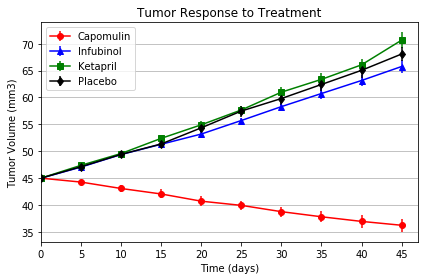

In [10]:
# Generate the Plot (with Error Bars)
ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")


# Plot the 'mean' list vs. the established x axis with error 

capomulin_mean_list=tumor_volume.iloc[:,0]
capomulin_sem_list=tumor_volume.iloc[:,4]
ax.errorbar(x_axis,capomulin_mean_list, yerr=capomulin_sem_list, fmt="red", marker="o",
                   label="Capomulin")

infubinol_mean_list=tumor_volume.iloc[:,1]
infubinol_sem_list=tumor_volume.iloc[:,5]    
ax.errorbar(x_axis,infubinol_mean_list, yerr=infubinol_sem_list, fmt="blue", marker="^",
                   label="Infubinol")

ketapril_mean_list=tumor_volume.iloc[:,2]
ketapril_sem_list=tumor_volume.iloc[:,6]    
ax.errorbar(x_axis,ketapril_mean_list, yerr=ketapril_sem_list, fmt="green", marker="s",
                   label="Ketapril")

placebo_mean_list=tumor_volume.iloc[:,3]
placebo_sem_list=tumor_volume.iloc[:,7]    
ax.errorbar(x_axis,placebo_mean_list, yerr=placebo_sem_list, fmt="black", marker="d",
                   label="Placebo")

# Add the legend and gridlines
ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('True', which='major', linestyle= 'solid', axis='y', linewidth=0.75)

plt.xlim(0, max(x_axis)+2)
        
plt.tight_layout()

# Save the Figure
plt.savefig("../Images/response_to_treatment_RT.png")

# Show the Figure
plt.show()

In [36]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metastatic_sites_vol =drug_clinical_trail.groupby(['Drug', 'Timepoint']).mean()["Metastatic Sites"].rename('Metastatic_mean')
metastatic_sites_vol.reset_index()

,Drug,Timepoint,Metastatic_mean
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

SE_met_sites = drug_clinical_trail.groupby(['Drug', 'Timepoint']).sem()["Metastatic Sites"].rename('SE_met_sites')
SE_met_sites.reset_index()



,Drug,Timepoint,SE_met_sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [14]:
# Minor Data Munging to Re-Format the Data Frames
compare_Metastatic_df=pd.merge(metastatic_sites_vol,SE_met_sites, on = ["Drug", "Timepoint"]).round(2)

# Preview that Reformatting worked
compare_Metastatic_df.reset_index(inplace=True)

#create new pivot table
met_sites_df= compare_Metastatic_df.pivot(index = "Timepoint", columns="Drug")
met_sites_df

Metastatic_mean                                               \
Drug            Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
Timepoint                                                                
0                    0.00     0.00      0.00     0.00     0.00    0.00   
5                    0.16     0.38      0.28     0.30     0.26    0.38   
10                   0.32     0.60      0.67     0.59     0.52    0.83   
15                   0.38     0.79      0.90     0.84     0.86    1.25   
20                   0.65     1.11      1.05     1.21     1.15    1.53   
25                   0.82     1.50      1.28     1.63     1.50    1.94   
30                   1.09     1.94      1.59     2.06     2.07    2.27   
35                   1.18     2.07      1.67     2.29     2.27    2.64   
40                   1.38     2.36      2.10     2.73     2.47    3.17   
45                   1.48     2.69      2.11     3.36     2.54    3.27   

                                               SE_met_sites           \
Drug      Propriva Ramicane Stelasyn Zoniferol    Capomulin Ceftamin   
Timepoint                                                              
0             0.00     0.00     0.00      0.00         0.00     0.00   
5             0.32     0.12     0.24      0.17         0.07     0.11   
10            0.57     0.25     0.48      0.50         0.13     0.15   
15            0.76     0.33     0.78      0.81         0.13     0.18   
20            1.00     0.35     0.95      1.29         0.16     0.24   
25            1.36     0.65     1.16      1.69         0.18     0.26   
30            1.62     0.78     1.39      1.93         0.17     0.25   
35            2.30     0.95     1.56      2.29         0.17     0.27   
40            2.78     1.10     1.58      2.79         0.18     0.29   
45            2.57     1.25     1.73      3.07         0.20     0.29   

                                                                          \
Drug      Infubinol Ketapril Naftisol Placebo Propriva Ramicane Stelasyn   
Timepoint                                                                  
0              0.00     0.00     0.00    0.00     0.00     0.00     0.00   
5              0.09     0.10     0.09    0.10     0.10     0.07     0.09   
10             0.16     0.14     0.16    0.12     0.11     0.09     0.12   
15             0.19     0.19     0.16    0.19     0.14     0.12     0.15   
20             0.23     0.24     0.18    0.23     0.17     0.12     0.20   
25             0.27     0.29     0.19    0.26     0.20     0.12     0.22   
30             0.23     0.35     0.27    0.30     0.27     0.14     0.23   
35             0.22     0.36     0.33    0.34     0.37     0.15     0.24   
40             0.31     0.32     0.32    0.30     0.43     0.16     0.31   
45             0.31     0.28     0.35    0.30     0.43     0.19     0.36   

                     
Drug      Zoniferol  
Timepoint            
0              0.00  
5              0.08  
10             0.11  
15             0.11  
20             0.17  
25             0.24  
30             0.25  
35             0.29  
40             0.30  
45             0.29

In [15]:
#Extract only required colums for metastatic mean values

metastatic_mean_df=met_sites_df.iloc[:,[0,2,3,5]]
metastatic_mean_df

Metastatic_mean                           
Drug            Capomulin Infubinol Ketapril Placebo
Timepoint                                           
0                    0.00      0.00     0.00    0.00
5                    0.16      0.28     0.30    0.38
10                   0.32      0.67     0.59    0.83
15                   0.38      0.90     0.84    1.25
20                   0.65      1.05     1.21    1.53
25                   0.82      1.28     1.63    1.94
30                   1.09      1.59     2.06    2.27
35                   1.18      1.67     2.29    2.64
40                   1.38      2.10     2.73    3.17
45                   1.48      2.11     3.36    3.27

In [16]:
#Extract only required colums for metastatic SE values

metastatic_SE_df=met_sites_df.iloc[:,[10,12,13,15]]
metastatic_SE_df


SE_met_sites                           
Drug         Capomulin Infubinol Ketapril Placebo
Timepoint                                        
0                 0.00      0.00     0.00    0.00
5                 0.07      0.09     0.10    0.10
10                0.13      0.16     0.14    0.12
15                0.13      0.19     0.19    0.19
20                0.16      0.23     0.24    0.23
25                0.18      0.27     0.29    0.26
30                0.17      0.23     0.35    0.30
35                0.17      0.22     0.36    0.34
40                0.18      0.31     0.32    0.30
45                0.20      0.31     0.28    0.30

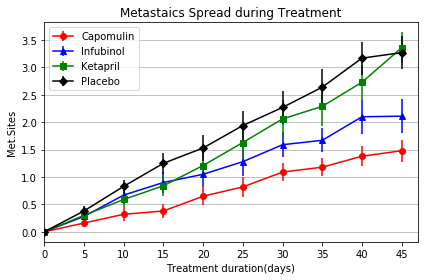

In [17]:
# Generate the Plot (with Error Bars)
ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Metastaics Spread during Treatment")
plt.xlabel("Treatment duration(days)")
plt.ylabel("Met.Sites")



# Plot the 'mean' list vs. the established x axis with error 

capomulin_metmean_list=metastatic_mean_df.iloc[:,0]
capomulin_metsem_list=metastatic_SE_df.iloc[:,0]
ax.errorbar(x_axis,capomulin_metmean_list, yerr=capomulin_metsem_list, fmt="red", marker="o",
                   label="Capomulin")

infubinol_metmean_list=metastatic_mean_df.iloc[:,1]
infubinol_metsem_list=metastatic_SE_df.iloc[:,1]    
ax.errorbar(x_axis,infubinol_metmean_list, yerr=infubinol_metsem_list, fmt="blue", marker="^",
                   label="Infubinol")

ketapril_metmean_list=metastatic_mean_df.iloc[:,2]
ketapril_metsem_list=metastatic_SE_df.iloc[:,2]    
ax.errorbar(x_axis,ketapril_metmean_list, yerr=ketapril_metsem_list, fmt="green", marker="s",
                   label="Ketapril")

placebo_metmean_list=metastatic_mean_df.iloc[:,3]
placebo_metsem_list=metastatic_SE_df.iloc[:,3]    
ax.errorbar(x_axis,placebo_metmean_list, yerr=placebo_metsem_list, fmt="black", marker="D",
                   label="Placebo")

# Add the legend and gridlines
ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('True', which='major', linestyle= 'solid', axis='y', linewidth=0.75)

plt.xlim(0, max(x_axis)+2)
        
plt.tight_layout()

# Save the Figure
plt.savefig("../Images/Metsastatic_Spread_RT.png")

# Show the Figure
plt.show()



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

mouse_count = pd.DataFrame(drug_clinical_trail.groupby(['Drug','Timepoint'])['Mouse ID'].count().rename('Mouse count'))
mouse_count.reset_index(inplace=True)
mouse_count


,Drug,Timepoint,Mouse count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [19]:
# Minor Data Munging to Re-Format the Data Frames

#mouse_count_df=mouse_count.drop(mouse_count.loc["Ceftamin","Naftisol","Propriva","Ramicane","Stelasyn","Zoniferol", :], axis=0)

mouse_count=mouse_count.reset_index()
mouse_count_df= mouse_count.pivot(index = "Timepoint", columns="Drug")["Mouse count"]

mouse_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


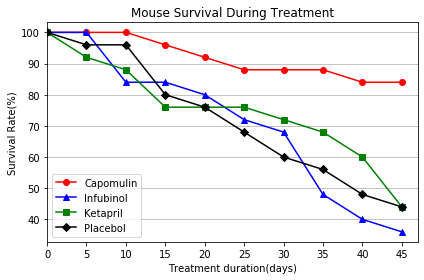

In [20]:
# Generate the Plot (Accounting for percentages)
ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

#plot

plt.plot(100*mouse_count_df["Capomulin"]/25, color="red", marker="o",label="Capomulin" )
plt.plot(100*mouse_count_df["Infubinol"]/25, color="blue", marker="^",label="Infubinol" )
plt.plot(100*mouse_count_df["Ketapril"]/25, color="green", marker="s",label="Ketapril" )
plt.plot(100*mouse_count_df["Placebo"]/25, color="black", marker="D",label="Placebol" )



# Set the plot title and axes titles
plt.title("Mouse Survival During Treatment")
plt.xlabel("Treatment duration(days)")
plt.ylabel("Survival Rate(%)")

# Add the legend and gridlines
ax.legend(loc=0)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('True', which='major', linestyle= 'solid', axis='y', linewidth=0.75)

plt.xlim(0, max(x_axis)+2)
        
plt.tight_layout()

# Save the Figure
plt.savefig("../Images/Metsastatic_Spread_RT.png")

# Show the Figure
plt.show()


In [37]:
# Minor Data Munging to Re-Format the Data Frames

mouse_count_treat=mouse_count_df.iloc[:,[0,2,3,5,]]
mouse_count_treat.reset_index()



Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19
5,25,22,18,19,17
6,30,22,17,18,15
7,35,22,12,17,14
8,40,21,10,15,12
9,45,21,9,11,11


In [22]:
# Minor Data Munging to Re-Format the Data Frames using lamda 

survival_df=mouse_count_treat.iloc[:, :].apply(lambda x: x/25*100)
survival_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug
tumor_perchange = 100*(tumor_vol_pivot.iloc[-1] - tumor_vol_pivot.iloc[0])/tumor_vol_pivot.iloc[0]
SE_perchange=100*(SE_tumor_volume_pivot.iloc[-1] - SE_tumor_volume_pivot.iloc[0])/SE_tumor_volume_pivot.iloc[0]


In [24]:
# Store all Relevant Percent Changes into a Tuple
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes

pct_changes = (tumor_perchange["Capomulin"],
             tumor_perchange["Infubinol"],
              tumor_perchange["Ketapril"],
              tumor_perchange["Placebo"])



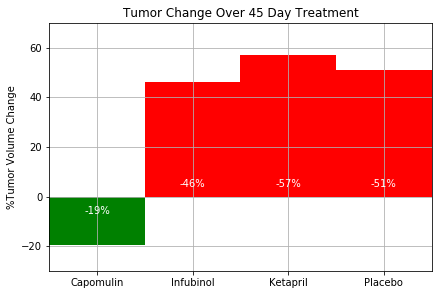

In [25]:
fig, ax=plt.subplots()

tumor_change=np.arange(len(pct_changes))

width=1

# Splice the data between passing and failing drugs
passvalues=ax.bar(tumor_change[0],pct_changes[0], width=1,color="green")

failvalues=ax.bar(tumor_change[1:],pct_changes[1:],width=1,color="red")


# Call functions to implement the function calls
def autolabelFail (values):
    for value in values:
        height=value.get_height()
        ax.text(value.get_x()+value.get_width()/2.,3, '-%d%%' % int(height),
        ha='center',va='bottom', color='white')
        
def autolabelPass (values):
    for value in values:
        height=value.get_height()
        ax.text(value.get_x()+value.get_width()/2.,-8, '%d%%' % int(height),
        ha='center',va='bottom', color='white')        
        

#call function

autolabelPass(passvalues)
autolabelFail(failvalues)

#plt.xlabel("Drug")
plt.tight_layout()


#tick_locations = [value for value in x_axis]

#orient width, add labels , tick marks, ect

ax.set_xticks(tumor_change)
ax.set_xticklabels(["Capomulin","Infubinol","Ketapril","Placebo"])
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel('%Tumor Volume Change')
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.set_xlim([-0.5,3.5])
ax.grid(True)

# Save the Figure

plt.savefig("../Images/tumor_change_RT.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/change.png)